<a href="https://colab.research.google.com/github/FaustoFLES/Programacion-Analitica/blob/main/Practica_25_Arbol_de_Decisi%C3%B3n_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
df = pd.read_csv(url)

display(df.head())

0.00632  18.00  2.310  0  0.5380  6.5750  65.20  4.0900  1  296.0  15.30  \
0  0.02731    0.0   7.07  0   0.469   6.421   78.9  4.9671  2  242.0   17.8   
1  0.02729    0.0   7.07  0   0.469   7.185   61.1  4.9671  2  242.0   17.8   
2  0.03237    0.0   2.18  0   0.458   6.998   45.8  6.0622  3  222.0   18.7   
3  0.06905    0.0   2.18  0   0.458   7.147   54.2  6.0622  3  222.0   18.7   
4  0.02985    0.0   2.18  0   0.458   6.430   58.7  6.0622  3  222.0   18.7   

   396.90  4.98  24.00  
0  396.90  9.14   21.6  
1  392.83  4.03   34.7  
2  394.63  2.94   33.4  
3  396.90  5.33   36.2  
4  394.12  5.21   28.7

In [2]:
descriptive_stats = df.describe()
display(descriptive_stats)

0.00632       18.00       2.310           0      0.5380      6.5750  \
count  505.000000  505.000000  505.000000  505.000000  505.000000  505.000000   
mean     3.620667   11.350495   11.154257    0.069307    0.554728    6.284059   
std      8.608572   23.343704    6.855868    0.254227    0.115990    0.703195   
min      0.009060    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082210    0.000000    5.190000    0.000000    0.449000    5.885000   
50%      0.259150    0.000000    9.690000    0.000000    0.538000    6.208000   
75%      3.678220   12.500000   18.100000    0.000000    0.624000    6.625000   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

            65.20      4.0900           1       296.0       15.30      396.90  \
count  505.000000  505.000000  505.000000  505.000000  505.000000  505.000000   
mean    68.581584    3.794459    9.566337  408.459406   18.461782  356.594376   
std     28.176371    2.107757    8.707553  168.629992    2.162520   91.367787   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.000000    2.100000    4.000000  279.000000   17.400000  375.330000   
50%     77.700000    3.199200    5.000000  330.000000   19.100000  391.430000   
75%     94.100000    5.211900   24.000000  666.000000   20.200000  396.210000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

             4.98       24.00  
count  505.000000  505.000000  
mean    12.668257   22.529901  
std      7.139950    9.205991  
min      1.730000    5.000000  
25%      7.010000   17.000000  
50%     11.380000   21.200000  
75%     16.960000   25.000000  
max     37.970000   50.000000

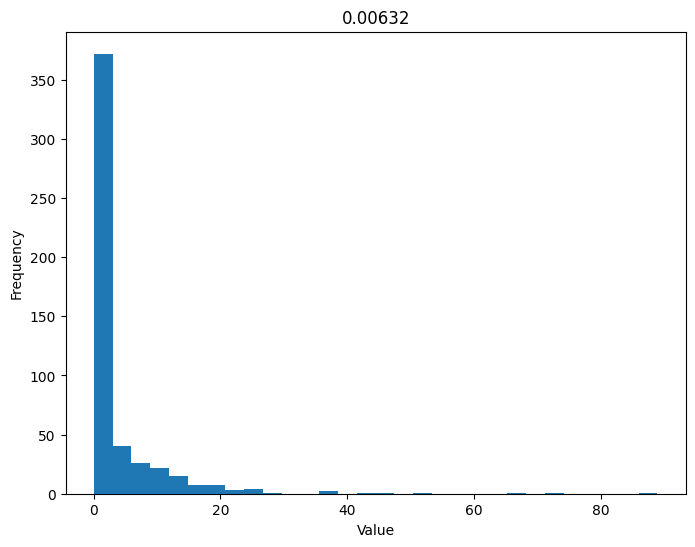

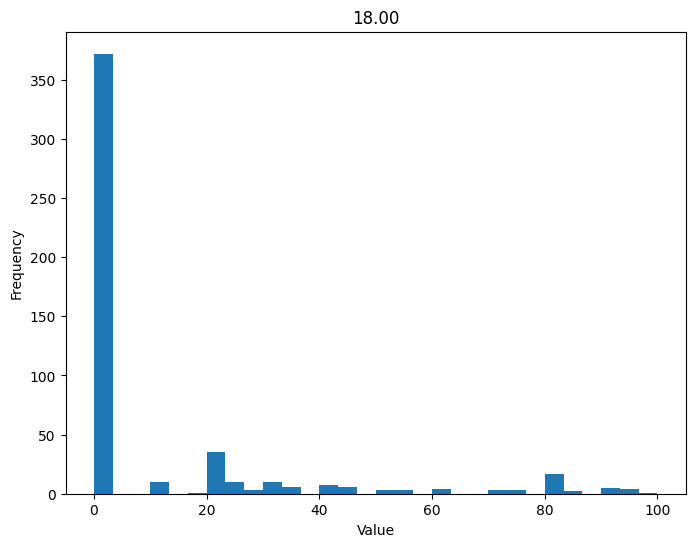

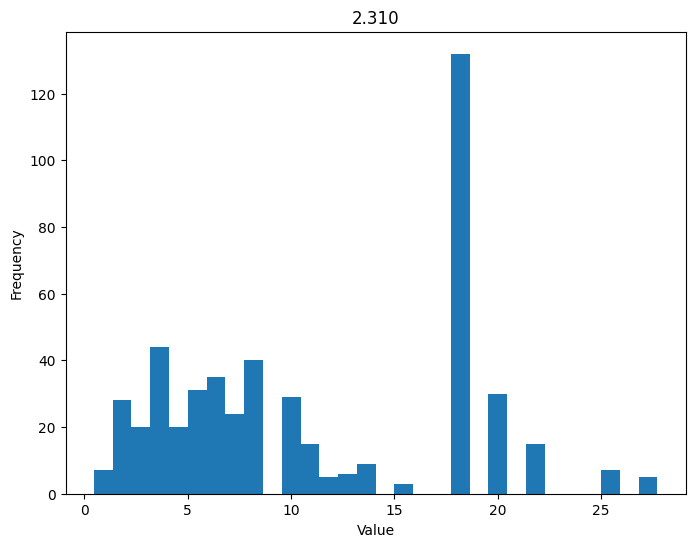

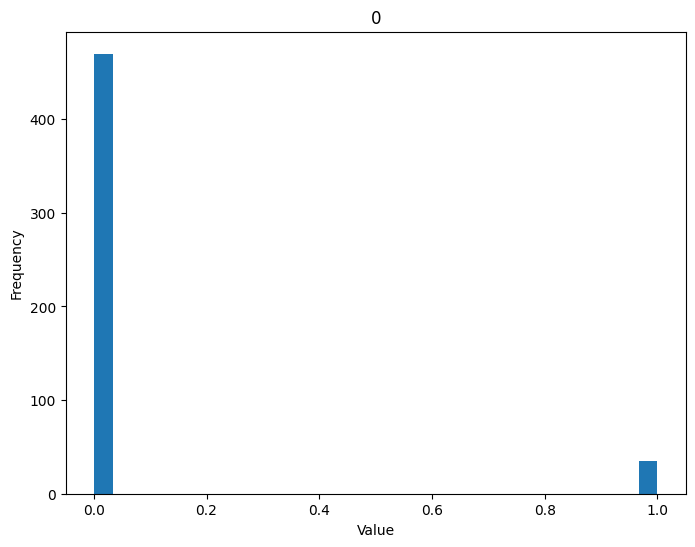

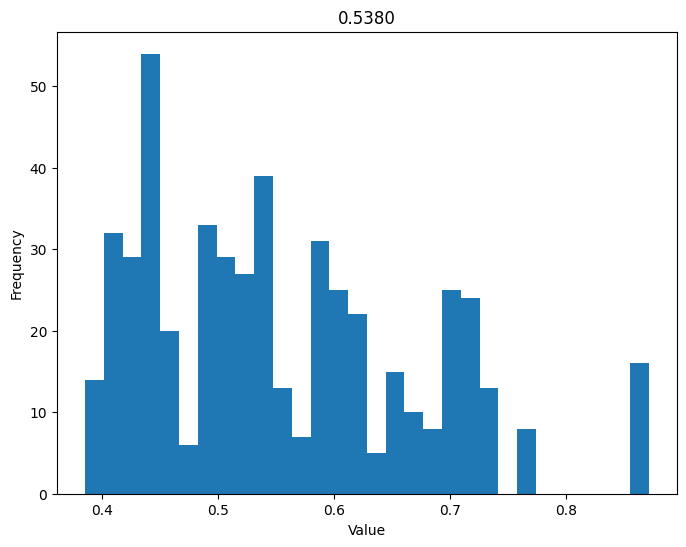

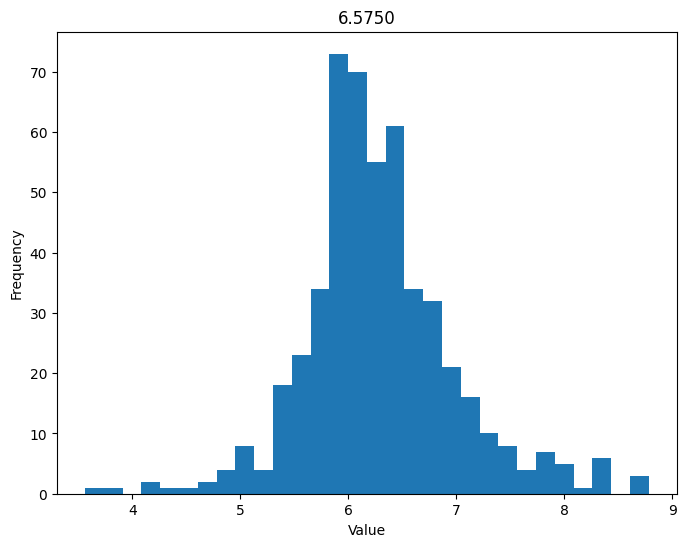

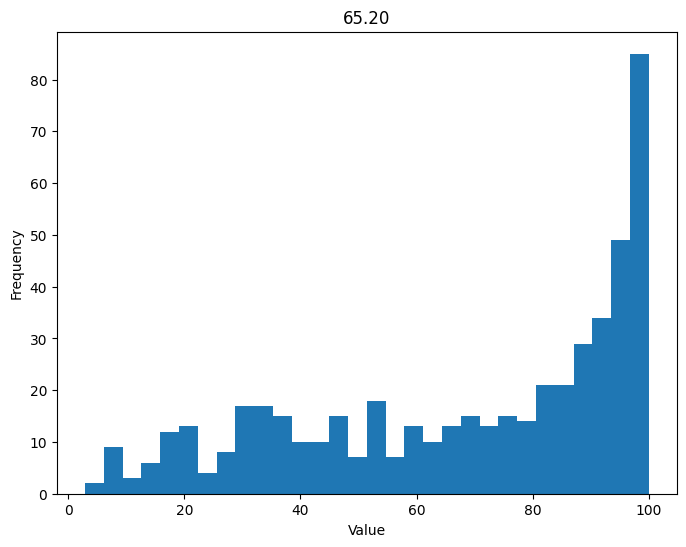

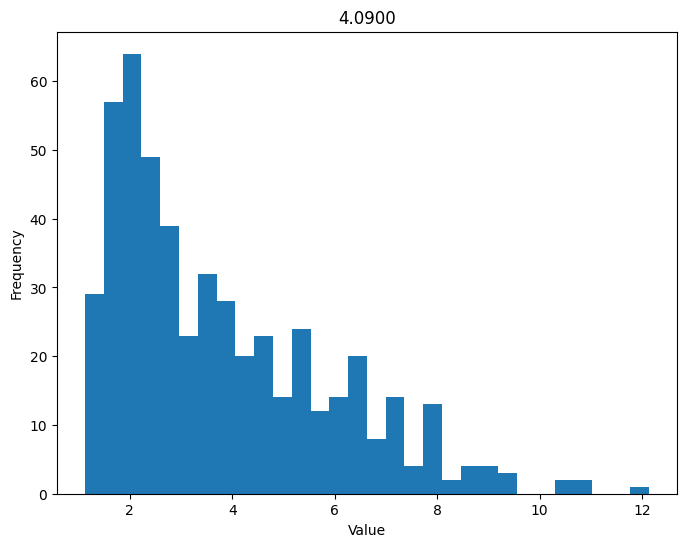

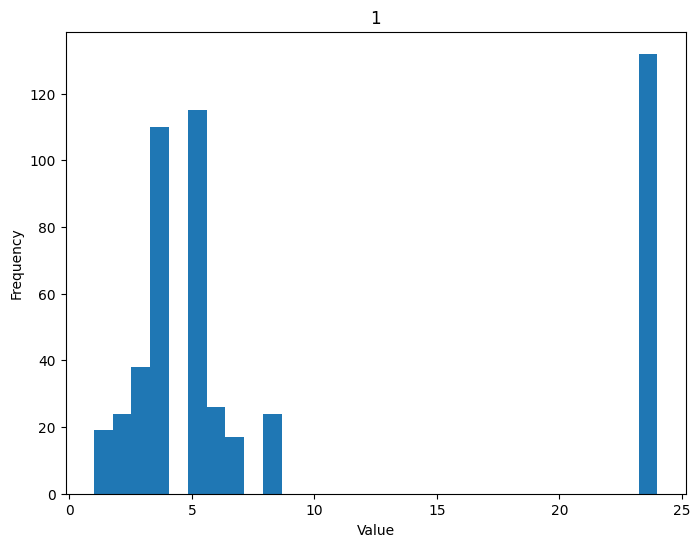

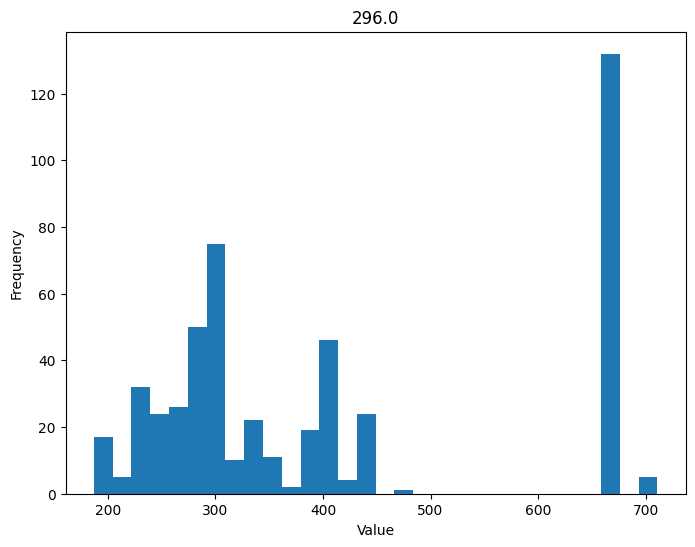

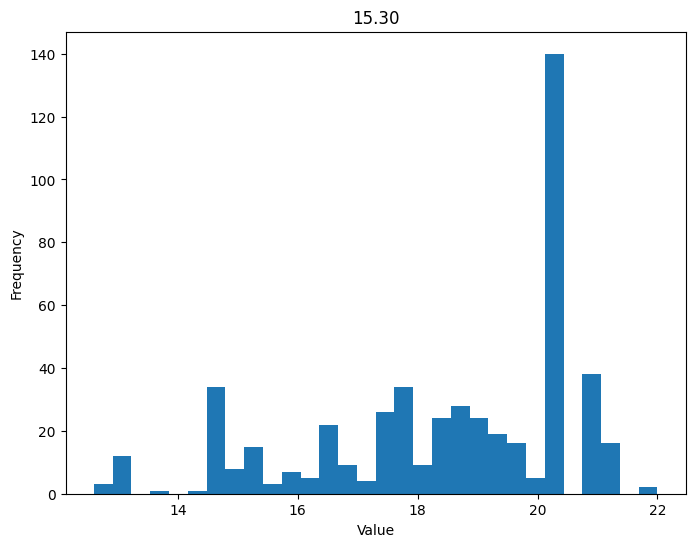

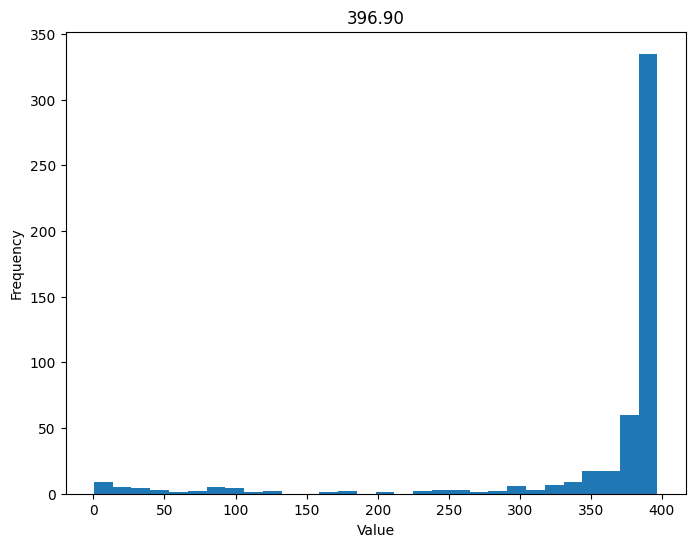

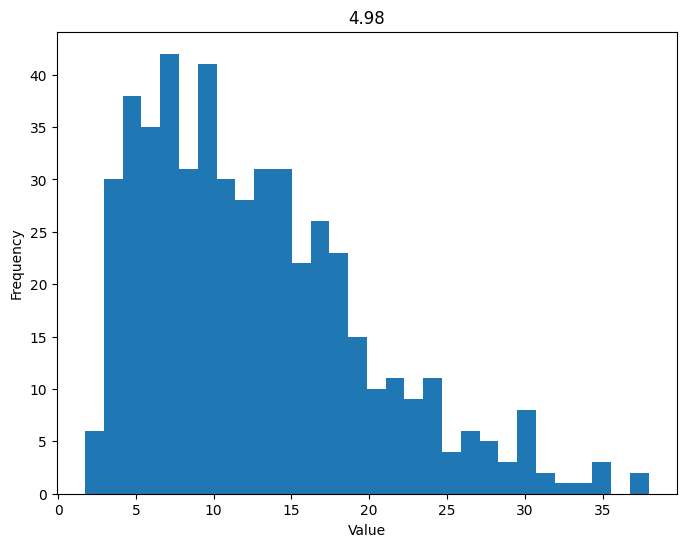

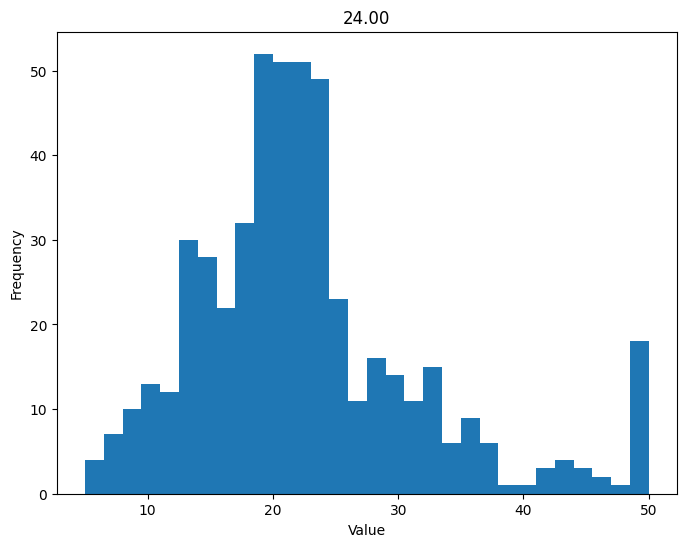

In [3]:
import matplotlib.pyplot as plt

for column in df.columns:
    plt.figure(figsize=(8, 6))
    plt.hist(df[column], bins=30)
    plt.title(column)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

In [5]:
# Check for missing values
print("Missing values before handling:")
print(df.isnull().sum())

# Handle missing values (example: fill with mean for numerical columns)
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        df[col] = df[col].fillna(df[col].mean())

print("\nMissing values after handling:")
print(df.isnull().sum())

# Check for non-numeric columns that might need encoding
print("\nData types of columns:")
print(df.dtypes)

# In this specific dataset, all columns appear to be numerical, so no encoding is needed.
# If there were categorical columns, we would use techniques like one-hot encoding.
# Example (if needed):
# df = pd.get_dummies(df, columns=['categorical_column'])

display(df.head())

Missing values before handling:
0.00632    0
18.00      0
2.310      0
0          0
0.5380     0
6.5750     0
65.20      0
4.0900     0
1          0
296.0      0
15.30      0
396.90     0
4.98       0
24.00      0
dtype: int64

Missing values after handling:
0.00632    0
18.00      0
2.310      0
0          0
0.5380     0
6.5750     0
65.20      0
4.0900     0
1          0
296.0      0
15.30      0
396.90     0
4.98       0
24.00      0
dtype: int64

Data types of columns:
0.00632    float64
18.00      float64
2.310      float64
0            int64
0.5380     float64
6.5750     float64
65.20      float64
4.0900     float64
1            int64
296.0      float64
15.30      float64
396.90     float64
4.98       float64
24.00      float64
dtype: object


0.00632  18.00  2.310  0  0.5380  6.5750  65.20  4.0900  1  296.0  15.30  \
0  0.02731    0.0   7.07  0   0.469   6.421   78.9  4.9671  2  242.0   17.8   
1  0.02729    0.0   7.07  0   0.469   7.185   61.1  4.9671  2  242.0   17.8   
2  0.03237    0.0   2.18  0   0.458   6.998   45.8  6.0622  3  222.0   18.7   
3  0.06905    0.0   2.18  0   0.458   7.147   54.2  6.0622  3  222.0   18.7   
4  0.02985    0.0   2.18  0   0.458   6.430   58.7  6.0622  3  222.0   18.7   

   396.90  4.98  24.00  
0  396.90  9.14   21.6  
1  392.83  4.03   34.7  
2  394.63  2.94   33.4  
3  396.90  5.33   36.2  
4  394.12  5.21   28.7

In [6]:
from sklearn.model_selection import train_test_split

# Assuming the last column is the target variable (housing price) and the rest are features
X = df.iloc[:, :-1]  # Features
y = df.iloc[:, -1]   # Target variable

# Split the data into training and testing sets (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape (X_train, y_train):", X_train.shape, y_train.shape)
print("Testing set shape (X_test, y_test):", X_test.shape, y_test.shape)

Training set shape (X_train, y_train): (404, 13) (404,)
Testing set shape (X_test, y_test): (101, 13) (101,)


In [7]:
from sklearn.tree import DecisionTreeRegressor

# Initialize the Decision Tree Regressor model
model = DecisionTreeRegressor(random_state=42)

# Train the model using the training data
model.fit(X_train, y_train)

print("Decision Tree Regressor model trained successfully.")

Decision Tree Regressor model trained successfully.


In [8]:
max_depth_values = [2, 5, 10, 15, 20]
print("List of max_depth values to experiment with:", max_depth_values)

List of max_depth values to experiment with: [2, 5, 10, 15, 20]


In [9]:
from sklearn.metrics import mean_squared_error, r2_score

mse_scores = []
r2_scores = []

In [10]:
for depth in max_depth_values:
    # Initialize the Decision Tree Regressor model with the current max_depth
    model = DecisionTreeRegressor(max_depth=depth, random_state=42)

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Append the metrics to the lists
    mse_scores.append(mse)
    r2_scores.append(r2)

print("MSE scores for different max_depth values:", mse_scores)
print("R-squared scores for different max_depth values:", r2_scores)

MSE scores for different max_depth values: [18.31222513234937, 20.175530415127778, 20.912232171085897, 21.127696459020907, 22.463514851485144]
R-squared scores for different max_depth values: [0.6713654633480651, 0.6379262464412543, 0.6247052621823684, 0.6208385007200776, 0.5968656598836513]


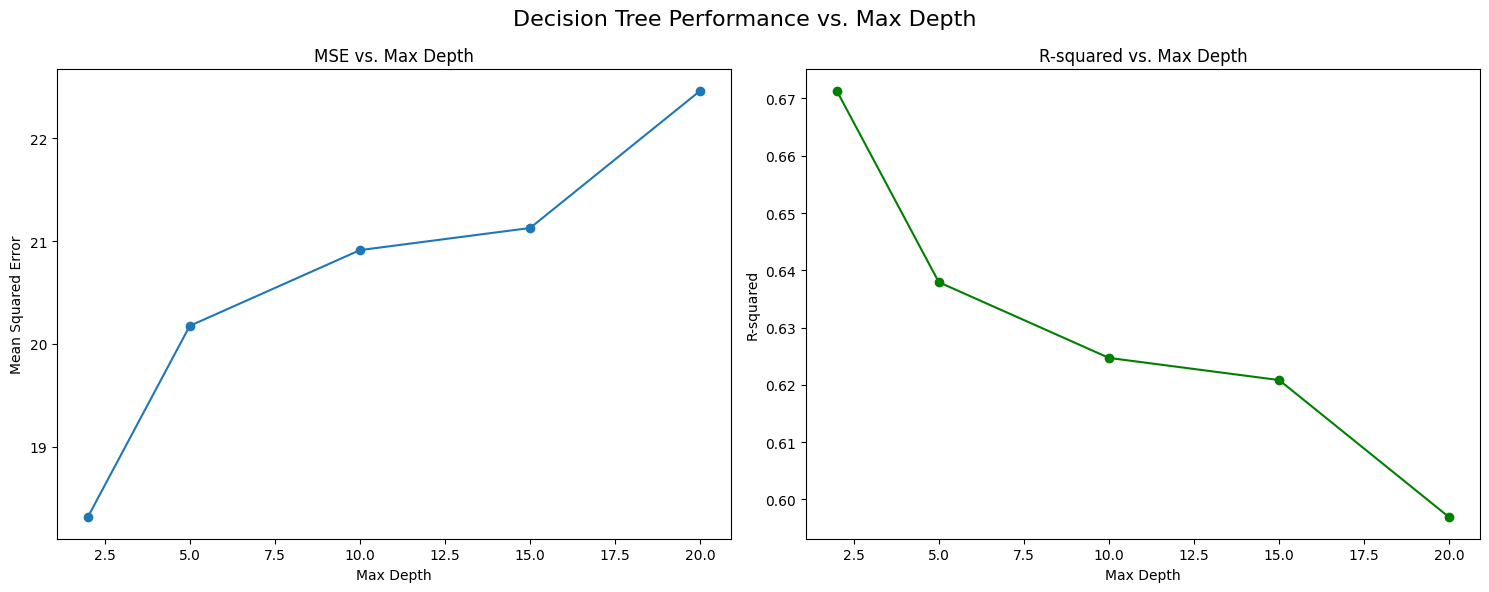

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot MSE vs. Max Depth
axes[0].plot(max_depth_values, mse_scores, marker='o')
axes[0].set_xlabel('Max Depth')
axes[0].set_ylabel('Mean Squared Error')
axes[0].set_title('MSE vs. Max Depth')

# Plot R-squared vs. Max Depth
axes[1].plot(max_depth_values, r2_scores, marker='o', color='green')
axes[1].set_xlabel('Max Depth')
axes[1].set_ylabel('R-squared')
axes[1].set_title('R-squared vs. Max Depth')

fig.suptitle('Decision Tree Performance vs. Max Depth', fontsize=16)

plt.tight_layout()
plt.show()